Number of image: 35887
Done
Train on 28709 samples, validate on 3589 samples
Epoch 1/50
28709/28709 [==============================] - 37s 1ms/step - loss: 1.7884 - accuracy: 0.3321 - val_loss: 1.7210 - val_accuracy: 0.3633

Epoch 00001: accuracy improved from -inf to 0.33213, saving model to mixModel_model.hdf5
Epoch 2/50
28709/28709 [==============================] - 33s 1ms/step - loss: 1.5255 - accuracy: 0.4156 - val_loss: 2.0215 - val_accuracy: 0.3686

Epoch 00002: accuracy improved from 0.33213 to 0.41558, saving model to mixModel_model.hdf5
Epoch 3/50
28709/28709 [==============================] - 33s 1ms/step - loss: 1.4100 - accuracy: 0.4619 - val_loss: 1.3521 - val_accuracy: 0.4935

Epoch 00003: accuracy improved from 0.41558 to 0.46188, saving model to mixModel_model.hdf5
Epoch 4/50
28709/28709 [==============================] - 34s 1ms/step - loss: 1.3388 - accuracy: 0.4961 - val_loss: 1.3344 - val_accuracy: 0.4873

Epoch 00004: accuracy improved from 0.46188 to 0.49612, sa

28709/28709 [==============================] - 33s 1ms/step - loss: 0.5718 - accuracy: 0.7833 - val_loss: 1.3804 - val_accuracy: 0.5595

Epoch 00035: accuracy improved from 0.78129 to 0.78331, saving model to mixModel_model.hdf5
Epoch 36/50
28709/28709 [==============================] - 33s 1ms/step - loss: 0.5575 - accuracy: 0.7916 - val_loss: 1.3742 - val_accuracy: 0.5681

Epoch 00036: accuracy improved from 0.78331 to 0.79156, saving model to mixModel_model.hdf5
Epoch 37/50
28709/28709 [==============================] - 33s 1ms/step - loss: 0.5539 - accuracy: 0.7936 - val_loss: 1.4031 - val_accuracy: 0.5623

Epoch 00037: accuracy improved from 0.79156 to 0.79358, saving model to mixModel_model.hdf5
Epoch 38/50
28709/28709 [==============================] - 33s 1ms/step - loss: 0.5352 - accuracy: 0.8018 - val_loss: 1.3751 - val_accuracy: 0.5723

Epoch 00038: accuracy improved from 0.79358 to 0.80180, saving model to mixModel_model.hdf5
Epoch 39/50
28709/28709 [=======================

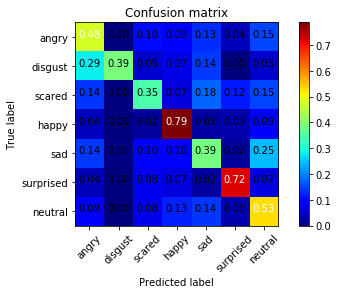

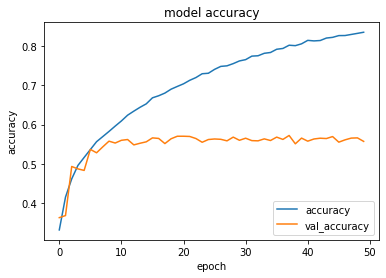

<Figure size 432x288 with 0 Axes>

In [2]:
'''
This is used to build models
'''
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import keras
import Ipynb_importer
from Load_FER2013_data import load_data
from Training_analysis import accuracy_chart_single
from Training_analysis import plot_confuse

import itertools
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2


%matplotlib inline

batch_size = 20
epochs_num = 50

input_shape = (48, 48, 1)
num_classes = 7
#local_path = 'model/'



def leNet5(input_shape, num_classes):
    
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size = (5, 5), strides = (1, 1), activation = 'relu', input_shape = input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3), strides = (2, 2)))
    
    model.add(Conv2D(64, (5, 5), strides = (1, 1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides = (2, 2)))
    
    model.add(Conv2D(128, (5, 5), strides = (1, 1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides = (2, 2)))
    
    #model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))

    #model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu'))
    
    output = model.add(Dense(num_classes, activation = 'softmax'))
    
    return model
              
def AlexNet(input_shape, num_classes):
    
    model = Sequential()

    model.add(Conv2D(16, (3, 3), input_shape = input_shape, activation = 'relu'))

    model.add(Conv2D(16, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2)))
    
    model.add(Conv2D(64, (2, 2), strides = (1, 1), padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, (2, 2), strides = (1, 1), padding = 'same', activation = 'relu'))
    model.add(Conv2D(128, (1, 1), strides = (1, 1), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (3, 3), strides= (2, 2)))
    
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.50))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.50))
    model.add(Dense(num_classes, activation = 'softmax'))
    
    return model
    
def mini_XCEPTION(input_shape, num_classes, l2_regularization=0.01):
    regularization = l2(l2_regularization)

    # base
    img_input = Input(input_shape)
    x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
                                            use_bias=False)(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
                                            use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # module 1
    residual = Conv2D(16, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(16, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(16, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    # module 2
    residual = Conv2D(32, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(32, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(32, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    # module 3
    residual = Conv2D(64, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(64, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(64, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    # module 4
    residual = Conv2D(128, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(128, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(128, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])

    x = Conv2D(num_classes, (3, 3),
            #kernel_regularizer=regularization,
            padding='same')(x)
    x = GlobalAveragePooling2D()(x)
    output = Activation('softmax',name='predictions')(x)

    model = Model(img_input, output)
    return model

def mixModel(input_shape, num_classes):
    
    model = Sequential()
    
    #base
    model.add(Conv2D(filters = 16, kernel_size = (5, 5), padding = 'same', input_shape = input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 16, kernel_size = (5, 5), strides = (2, 2), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.25))
    
    #model 1
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'same'))    
    model.add(BatchNormalization())    
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), strides = (2, 2), padding = 'same'))    
    model.add(BatchNormalization())    
    model.add(Activation('relu'))    
    #model.add(Dropout(0.25))
    
    #model 2
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))    
    model.add(BatchNormalization())    
    model.add(Conv2D(filters = 64, kernel_size = (3, 3),  strides = (2, 2), padding = 'same'))    
    model.add(BatchNormalization())    
    model.add(Activation('relu'))    
    model.add(Dropout(0.25))
    
    #model 3
    model.add(Conv2D(filters = 64, kernel_size = (1, 1), padding = 'same'))    
    model.add(BatchNormalization())    
    model.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (2, 2), padding = 'same'))    
    model.add(BatchNormalization())    
    model.add(Activation('relu'))    
    model.add(Dropout(0.25))     
    model.add(Conv2D(filters = 256, kernel_size = (1, 1), padding = 'same'))    
    model.add(BatchNormalization())    
    model.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (2, 2), padding = 'same'))     
    model.add(Conv2D(filters = 256, kernel_size = (1, 1), padding = 'same'))    
    model.add(BatchNormalization())   
    model.add(Conv2D(filters = num_classes, kernel_size = (2, 2), strides = (2, 2), padding = 'same'))     
    model.add(Flatten())    
    model.add(Activation('softmax',name = 'predictions'))
    
    return model

def runingModel(model):
    
    history = None
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x1, y1, batch_size, epochs = epochs_num, verbose=1, callbacks = callbacks_list, validation_data=(x2, y2))

    model.summary()
    print(model.summary())

    return history

def historySave(history_name, history_file):
    with open(history_name, 'wb') as file_pi:
        pickle.dump(history_file.history, file_pi)
def historyRead(history_name):
    with open(history_name, 'rb') as file_pi:
        history_read = pickle.load(file_pi)
        return history_read

x1, y1, x2, y2 = load_data()

'''
model = mini_XCEPTION(input_shape, num_classes)s
history_mx = runingModel(model)

model = leNet5(input_shape, num_classes)
history_leNet5 = runingModel(model)

model = AlexNet(input_shape, num_classes)
history_AlexNet = runingModel(model)

model = mixModel(input_shape, num_classes)
history_mM = runingModel(model)
'''

model_name = "mixModel_"

model_Output_Path = model_name + "model.hdf5"
checkpoint = ModelCheckpoint(model_Output_Path, monitor = 'accuracy', verbose = 1, save_best_only = True, mode = 'max')
callbacks_list = [checkpoint]

model = mixModel(input_shape, num_classes)
history_mM = runingModel(model)

txt_Path = model_name + "History.txt"
png_Path = model_name + "History.png"
historySave(txt_Path, history_mM)
plot_confuse(model, x2, y2, png_Path)
accuracy_chart_single(history_mM, "acc_" + png_Path)

#evaluate model on test data
score = model.evaluate(x2, y2, verbose=0)

